In [1]:
import numpy as np


def MT1D(ρ, h, f):
    µ = 4 * np.pi * 1E-7  # Magnetic Permeability (H/m)
    ω = 2 * np.pi * f  # Angular Frequency (Radians)
    n = len(ρ)  # Number of Layers

    impedances = np.zeros(len(f), dtype=complex)  # Initialize impedances

    for i in range(len(f)):  # Loop through frequencies
        Zn = np.sqrt(1j * ω[i] * µ * ρ[-1])  # Calculate Zn for each frequency
        impedances[i] = Zn  # Assign Zn to impedances

        for j in range(n - 1, 0, -1):
            resistivity = ρ[j - 1]
            thickness = h[j - 1]

            dj = np.sqrt(1j * ω[i] * µ / resistivity)
            wj = dj * resistivity
            ej = np.exp(-2 * thickness * dj)
            belowImpedance = impedances[i]
            rj = (wj - belowImpedance) / (wj + belowImpedance)
            re = rj * ej
            Zj = wj * ((1 - re) / (1 + re))
            impedances[i] = Zj  # Update impedances

    return impedances

# Model Selection
Modelname = '1' # select the model to be calculated

if Modelname == '1':
    rsyn = np.array([100, 1000, 10])
    tsyn = np.array([500, 1000])
elif Modelname == '2':
    rsyn = np.array([100, 10, 1000])
    tsyn = np.array([500, 1000])

ndata = 56
freq = np.logspace(-3, 4, ndata)  # frequency from 10^-3 to 10^4

Impedance = MT1D(rsyn, tsyn, freq)  # calculate synthetic model using MT1D function
µ = 4 * np.pi * 1E-7  # Magnetic Permeability (H/m)
noise_level = 0.05 # 5% noise

appRes_noise = np.zeros(ndata)
phase_noise = np.zeros(ndata)

for idat in range(ndata):
    ω = 2 * np.pi * freq[idat]
    Z = Impedance[idat]

    absZ = np.abs(Z)
    appRes = (absZ ** 2) / (ω * µ)
    phase = np.degrees(np.arctan2(np.imag(Z), np.real(Z)))

    # Add noise 5%
    Z_noise = Z + Z * noise_level * np.random.randn()
    zre_noise = np.real(Z) + np.real(Z) * noise_level * np.random.randn()
    zim_noise = np.imag(Z) + np.imag(Z) * noise_level * np.random.randn()

    appRes_noise[idat] = (np.abs(Z_noise) ** 2) / (ω * µ)
    phase_noise[idat] = np.degrees(np.arctan2(zim_noise, zre_noise))

# Save data to a text file
data = np.column_stack((freq, appRes_noise, phase_noise))
np.savetxt(f'Data Synthetic Model_{Modelname}.txt', data, header="Frequency Apparent Resistivity Phase", comments='')


print(f"Data sudah tersimpan : Data Synthetic Model_{Modelname}.txt")

Data sudah tersimpan : Data Synthetic Model_1.txt


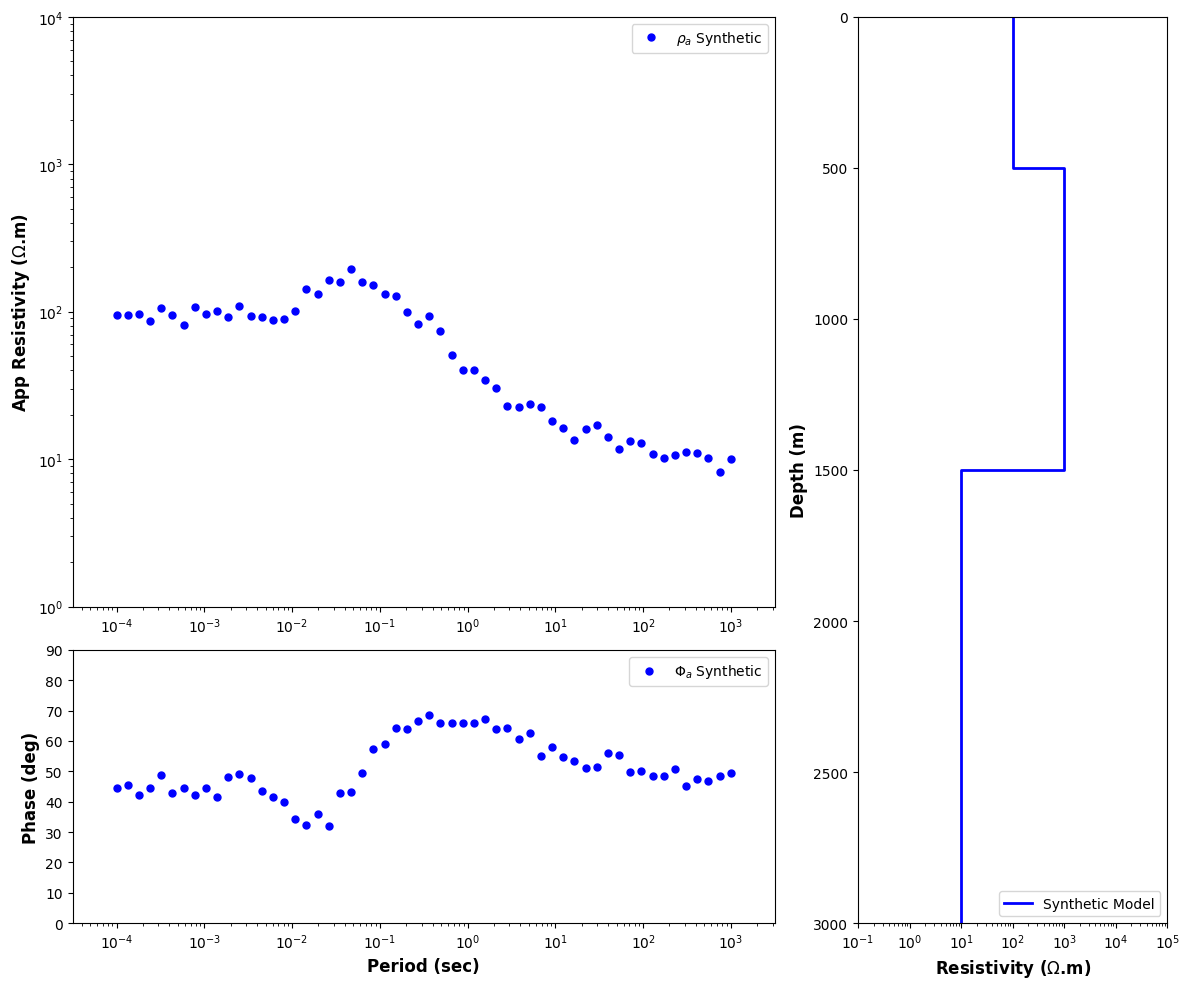

In [2]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(12, 10))

# Subplot 1: Apparent Resistivity vs Periods
plt.subplot(3, 3, (1, 5))
plt.ylabel(r'App Resistivity ($\Omega$.m)', fontsize=12, fontweight='bold')
plt.loglog(1/freq, appRes_noise, 'ob', markersize=5, linewidth=2)
plt.xlim(10**-4.5, 10**3.5)
plt.ylim(1e0, 1e4)
plt.legend([(r'$\rho_a$ Synthetic')], loc='best', fontsize=10)

# Subplot 2: Phase vs Periods
plt.subplot(3, 3, (7, 8))
plt.xlabel('Period (sec)', fontsize=12, fontweight='bold')
plt.ylabel('Phase (deg)', fontsize=12, fontweight='bold')
plt.semilogx(1/freq, phase_noise, 'ob', markersize=5, linewidth=2)
plt.xlim(10**-4.5, 10**3.5)
plt.ylim(0, 90)
plt.legend([(r'$\Phi_a$ Synthetic')], loc='best', fontsize=10)

# Subplot 3: 1D MT Model Plot
plt.subplot(3, 3, (3, 9))
plt.xlabel(r'Resistivity ($\Omega$.m)', fontsize=12, fontweight='bold')
plt.ylabel('Depth (m)', fontsize=12, fontweight='bold')
plt.step([rsyn[0]] + rsyn.tolist(), [0] + np.cumsum(tsyn).tolist() + [max(tsyn) * 1000], where='post', color='b', linewidth=2)
plt.xscale('log')
plt.xlim(1e-1, 1e5)
plt.ylim(0, 3000)
plt.gca().invert_yaxis()
plt.legend(['Synthetic Model'], loc='lower right', fontsize=10)
plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.savefig('1D_MT_Model_2.png', format='png', dpi=300)

plt.tight_layout()
plt.show()